In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df_clinics = pd.read_excel('../data/processed/df_clinics_clean.xlsx')
df_activity = pd.read_excel('../data/processed/df_activity_clean.xlsx')
df_subscriptions = pd.read_excel('../data/processed/df_subscriptions_clean.xlsx')

### Média de atividades das clínicas

C:\Users\msant\AppData\Local\Temp\ipykernel_19192\1698309315.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Clínicas Convertidas', 'Clinicas não convertidas'], y=[mean_converted_activities, mean_non_converted_activities], palette=cores)


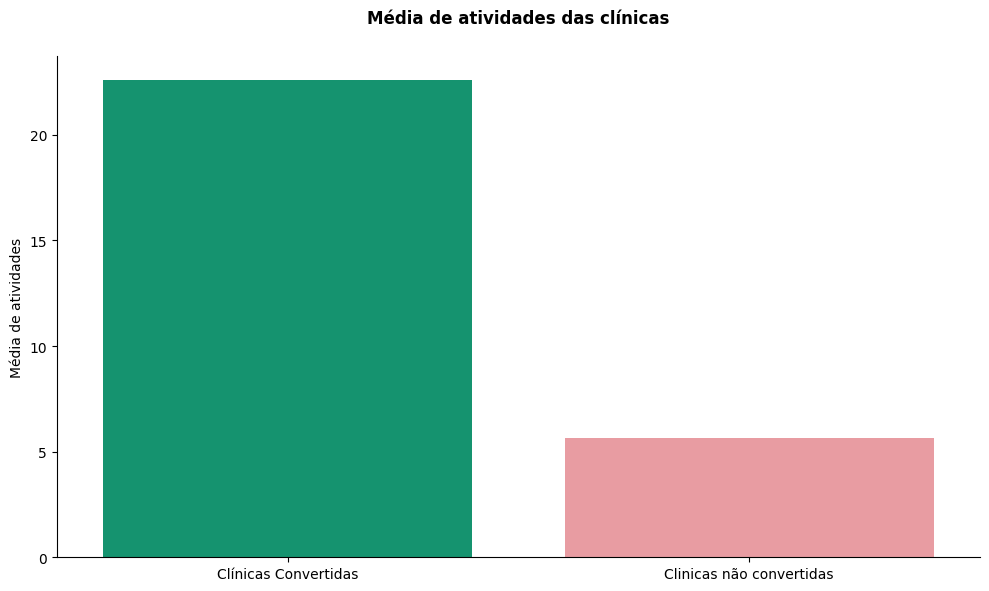

In [43]:
# Criando um df apenas com as atividades válidas
valid_activities = df_activity[df_activity['IS_VALID_ACTIVITY']]

# Guardando os IDs das assinaturas convertidas
id_converted = df_subscriptions[df_subscriptions['SUBSCRIPTION_STATUS'] != 'canceled']['CLINIC_ID']

# Separando as atividades válidas dos IDs das assinaturas convertidas e não convertidas
converted_activities = valid_activities[valid_activities['CLINIC_ID'].isin(id_converted)]
non_converted_activities = valid_activities[~valid_activities['CLINIC_ID'].isin(id_converted)]

# Contando as clínicas
converted_activities_count = converted_activities.groupby('CLINIC_ID')['ACTIVITY_AT'].count()
non_converted_activities_count = non_converted_activities.groupby('CLINIC_ID')['ACTIVITY_AT'].count()

# Calculando a média
mean_converted_activities = converted_activities_count.mean()
mean_non_converted_activities = non_converted_activities_count.mean()

# Escolhendo as cores
cores = ['#00a878','#f49097']

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=['Clínicas Convertidas', 'Clinicas não convertidas'], y=[mean_converted_activities, mean_non_converted_activities], palette=cores)
plt.title('Média de atividades das clínicas', fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('Média de atividades')
sns.despine(right=True)
plt.tight_layout()
plt.show()

Sendo:

- H0: média das convertidas $=$ média das não convertidas
- Ha: média das convertidas $\ne$ média das não convertidas

Nivel de significancia = 0.05

Faremos o teste de hipótese

In [5]:
t_stat, p_value = stats.ttest_ind(converted_activities_count, non_converted_activities_count)
t_stat, p_value

(7.4629104597978575, 2.0852525337082883e-13)

Sendo o p valor menor que 0.05, podemos concluir que a diferença média das atividades válidas entre as clínicas convertidas e não convertidas **são estatisticamente significativas**.

Isso indica que a quantidade de atividades realizadas pela clínica é um fator decisivo para a assinatura.

### Taxa de conversão por aprovação de credenciamento (BNPL)

C:\Users\msant\AppData\Local\Temp\ipykernel_19192\2059696099.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Clínicas Convertidas', 'Clinicas não convertidas'], y=[bnpl_app_converted*100, bnpl_app_non_converted*100], palette=cores)


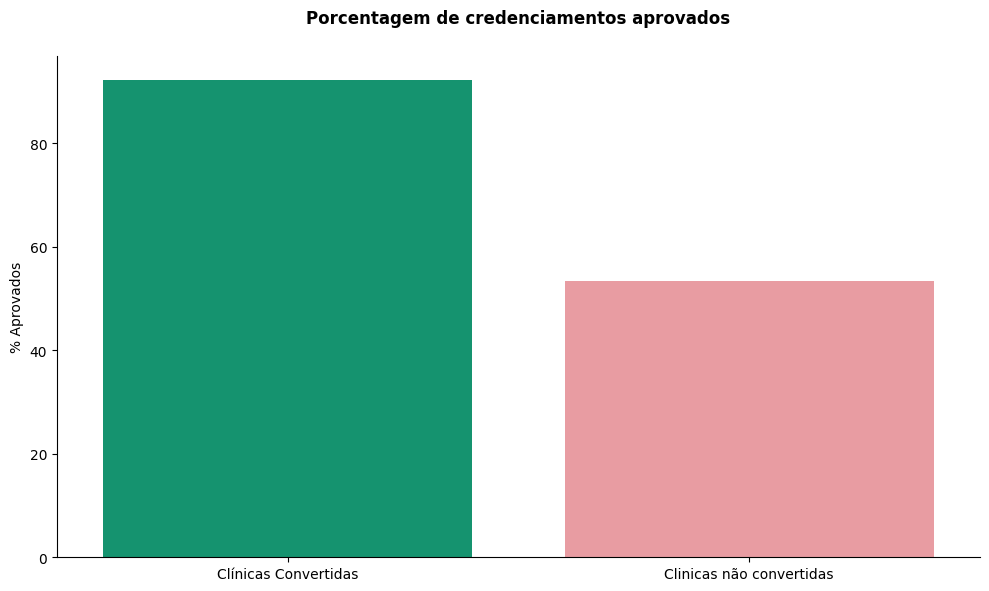

In [42]:
# Separando as clínicas convertidas
converted_clinics = df_clinics[df_clinics['CLINIC_ID'].isin(id_converted)]

# Separando as clínicas não convertidas
non_converted_clinics = df_clinics[~df_clinics['CLINIC_ID'].isin(id_converted)]

# Criando a média de credenciamento aprovado das clinicas convertidas
bnpl_app_converted = converted_clinics[converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].mean()

# Criando a média de credenciamento aprovado das clinicas não convertidas
bnpl_app_non_converted = non_converted_clinics[non_converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].mean()

# Escolhendo as cores
cores = ['#00a878','#f49097']

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=['Clínicas Convertidas', 'Clinicas não convertidas'], y=[bnpl_app_converted*100, bnpl_app_non_converted*100], palette=cores)
plt.title('Porcentagem de credenciamentos aprovados', fontsize=12, fontweight='bold', y=1.05)
plt.ylabel('% Aprovados')
sns.despine(right=True)
plt.tight_layout()
plt.show()

Sendo:

- H0: proporção das convertidas $=$ proporção das não convertidas
- Ha: proporção das convertidas $\ne$ proporção das não convertidas

Nivel de significancia = 0.05

Faremos o teste de hipótese

In [7]:
count = [converted_clinics[converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].sum(),
         non_converted_clinics[non_converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].sum()]

nobs = [converted_clinics[converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].count(),
        non_converted_clinics[non_converted_clinics['HAS_ASKED_FOR_ACCREDITATION']]['IS_ACCREDITATION_APPROVED'].count()]

t_stat, p_value = proportions_ztest(count, nobs)
t_stat, p_value

(10.259747492115528, 1.0698612833138183e-24)

Sendo o p valor menor que 0.05, podemos concluir que a diferença das proporções de aprovação do credenciamento entre as clínicas convertidas e não convertidas **são estatisticamente significativas**.

Isso pode significar que o BNPL, nosso principal produto, é um fator decisivo de assinatura das clínicas.